In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read in ppe info from ca open data portal
ppe = pd.read_csv("Resources/logistics_ppe.csv")

In [3]:
#drop rows with nan values for the following columns
ppe = ppe.dropna(subset=["quantity_filled", "county", "product_family"])

In [4]:
#new dataframes for each metro statistical area
LA_ppe = ppe.loc[(ppe["county"] == "Los Angeles") | (ppe["county"] == "Orange")]
SF_ppe = ppe.loc[(ppe["county"] == "San Francisco") | (ppe["county"] == "Marin") | (ppe["county"] == "Alameda") | (ppe["county"] == "Contra Costa") | (ppe["county"] == "San Mateo")]

In [5]:
#dates are all over the place, sorting from earliest to latest (low to high)
LA_ppe = LA_ppe.sort_values("as_of_date")
SF_ppe = SF_ppe.sort_values("as_of_date")

#reset the index for the df ordered by date
LA_ppe = LA_ppe.reset_index()
SF_ppe = SF_ppe.reset_index()

In [6]:
#create list of product families, and empty lists for each two-week period
product_list = LA_ppe["product_family"].unique().tolist()
week1 = []
week2 = []
week3 = []
week4 = []
week5 = []
week6 = []
week7 = []
week8 = []

#iterate through the list of product families, store the total quantity fulfilled in a two-week period
for x in product_list:
    one = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-06-08")
                     & (LA_ppe["as_of_date"] <= "2020-06-21")]["quantity_filled"].sum()
    week1.append(one)
    two = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-06-22")
                     & (LA_ppe["as_of_date"] <= "2020-07-05")]["quantity_filled"].sum()
    week2.append(two)
    three = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-07-06")
                     & (LA_ppe["as_of_date"] <= "2020-07-19")]["quantity_filled"].sum()
    week3.append(three)
    four = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-07-20")
                     & (LA_ppe["as_of_date"] <= "2020-08-02")]["quantity_filled"].sum()
    week4.append(four)
    five = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-08-03")
                     & (LA_ppe["as_of_date"] <= "2020-08-16")]["quantity_filled"].sum()
    week5.append(five)
    six = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-08-17")
                     & (LA_ppe["as_of_date"] <= "2020-08-30")]["quantity_filled"].sum()
    week6.append(six)
    seven = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-08-31")
                     & (LA_ppe["as_of_date"] <= "2020-09-13")]["quantity_filled"].sum()
    week7.append(seven)
    eight = LA_ppe.loc[(LA_ppe["product_family"] == x) & (LA_ppe["as_of_date"] >= "2020-09-14")
                     & (LA_ppe["as_of_date"] <= "2020-09-27")]["quantity_filled"].sum()
    week8.append(eight)

In [7]:
#create a new dataframe to hold results 
LA_weeks = pd.DataFrame({"Product Family": product_list, "06-08 to 06-21": week1, "06-22 to 07-05": week2,
                         "07-06 to 07-19": week3, "07-20 to 08-02": week4, "08-03 to 08-16": week5,
                         "08-17 to 08-30": week6, "08-31 to 09-13": week7, "09-14 to 09-27": week8})
LA_weeks

,Product Family,06-08 to 06-21,06-22 to 07-05,07-06 to 07-19,07-20 to 08-02,08-03 to 08-16,08-17 to 08-30,08-31 to 09-13,09-14 to 09-27
0,Other / None of the above,1849741.0,4087476.0,7041066.0,7075346.0,5722454.0,7454696.0,7462696.0,7462896.0
1,Viral Testing Media,6410496.0,9580992.0,12192112.0,13921192.0,12697230.0,16935156.0,17183556.0,17224956.0
2,Wipes,107744.0,139544.0,208544.0,258944.0,203456.0,286544.0,5089344.0,6886944.0
3,Face Shields (Disposable),14794020.0,18304820.0,24582916.0,28145816.0,24772970.0,34136524.0,36330828.0,36372140.0
4,N-95 Respirators,205211616.0,270064036.0,353349036.0,392023476.0,354177534.0,487928796.0,532225116.0,550617756.0
5,Surgical Masks,261291840.0,319947640.0,621483240.0,778204840.0,631646860.0,830875040.0,846392440.0,848101240.0
6,Swabs,10116100.0,15042100.0,19329100.0,21019100.0,17552150.0,22339100.0,22339100.0,22837100.0
7,Coveralls (Hospitals or EMS),283318.0,292068.0,304738.0,308738.0,243837.0,326338.0,332738.0,332738.0
8,Examination Gloves,75771400.0,142518000.0,207432600.0,232000160.0,205938840.0,337175160.0,386341160.0,391042160.0
9,Hand Sanitizers,8112649.0,11419042.0,16417476.0,21681104.0,20811557.0,27802748.0,28333472.0,28433392.0


In [8]:
#read in data on cases from ca open data portal
cases_df = pd.read_csv("Resources/statewide_cases.csv")

#create new dataframe for LA metro area, with new column to combine both county's cases
LA_cases = cases_df.loc[(cases_df["county"] == "Los Angeles")]
OC_cases = cases_df.loc[(cases_df["county"] == "Orange")]

LA_metro = pd.merge(LA_cases, OC_cases, how="outer", on="date")
LA_metro["newcounts"] = LA_metro["newcountconfirmed_x"] + LA_metro["newcountconfirmed_y"]

In [9]:
cases1 = LA_metro.loc[(LA_metro["date"] >= "2020-06-08") & (LA_metro["date"] <= "2020-06-21")]["newcounts"].sum()
cases2 = LA_metro.loc[(LA_metro["date"] >= "2020-06-22") & (LA_metro["date"] <= "2020-07-05")]["newcounts"].sum()
cases3 = LA_metro.loc[(LA_metro["date"] >= "2020-07-06") & (LA_metro["date"] <= "2020-07-19")]["newcounts"].sum()
cases4 = LA_metro.loc[(LA_metro["date"] >= "2020-07-20") & (LA_metro["date"] <= "2020-08-02")]["newcounts"].sum()
cases5 = LA_metro.loc[(LA_metro["date"] >= "2020-08-03") & (LA_metro["date"] <= "2020-08-16")]["newcounts"].sum()
cases6 = LA_metro.loc[(LA_metro["date"] >= "2020-08-17") & (LA_metro["date"] <= "2020-08-30")]["newcounts"].sum()
cases7 = LA_metro.loc[(LA_metro["date"] >= "2020-08-31") & (LA_metro["date"] <= "2020-09-13")]["newcounts"].sum()
cases8 = LA_metro.loc[(LA_metro["date"] >= "2020-09-14") & (LA_metro["date"] <= "2020-09-27")]["newcounts"].sum()

In [10]:
#new dataframe of total cases over two-weeks to append, using []/list to avoid scalar values error
cases = "New Cases"
LA_cases_weeks = pd.DataFrame({"Product Family": [cases], "06-08 to 06-21": [cases1], "06-22 to 07-05": [cases2],
                         "07-06 to 07-19": [cases3], "07-20 to 08-02": [cases4], "08-03 to 08-16": [cases5],
                         "08-17 to 08-30": [cases6], "08-31 to 09-13": [cases7], "09-14 to 09-27": [cases8]})

In [11]:
#append cases to the ppe dataframe
LA_weeks = LA_weeks.append(LA_cases_weeks, ignore_index = True)
LA_weeks

,Product Family,06-08 to 06-21,06-22 to 07-05,07-06 to 07-19,07-20 to 08-02,08-03 to 08-16,08-17 to 08-30,08-31 to 09-13,09-14 to 09-27
0,Other / None of the above,1849741.0,4087476.0,7041066.0,7075346.0,5722454.0,7454696.0,7462696.0,7462896.0
1,Viral Testing Media,6410496.0,9580992.0,12192112.0,13921192.0,12697230.0,16935156.0,17183556.0,17224956.0
2,Wipes,107744.0,139544.0,208544.0,258944.0,203456.0,286544.0,5089344.0,6886944.0
3,Face Shields (Disposable),14794020.0,18304820.0,24582916.0,28145816.0,24772970.0,34136524.0,36330828.0,36372140.0
4,N-95 Respirators,205211616.0,270064036.0,353349036.0,392023476.0,354177534.0,487928796.0,532225116.0,550617756.0
5,Surgical Masks,261291840.0,319947640.0,621483240.0,778204840.0,631646860.0,830875040.0,846392440.0,848101240.0
6,Swabs,10116100.0,15042100.0,19329100.0,21019100.0,17552150.0,22339100.0,22339100.0,22837100.0
7,Coveralls (Hospitals or EMS),283318.0,292068.0,304738.0,308738.0,243837.0,326338.0,332738.0,332738.0
8,Examination Gloves,75771400.0,142518000.0,207432600.0,232000160.0,205938840.0,337175160.0,386341160.0,391042160.0
9,Hand Sanitizers,8112649.0,11419042.0,16417476.0,21681104.0,20811557.0,27802748.0,28333472.0,28433392.0


In [15]:
#create empyt list
row_list = []

#iterate over each row
for index, rows in LA_weeks.iterrows():
    #create list for row elements you want
    my_list =[rows["06-08 to 06-21"], rows["06-22 to 07-05"], rows["07-06 to 07-19"], rows["07-20 to 08-02"],
              rows["08-03 to 08-16"], rows["08-17 to 08-30"], rows["08-31 to 09-13"], rows["09-14 to 09-27"]]
    
    #appent the list to the final list
    row_list.append(my_list)

#locate individual row lists by index    
LA_surgical = row_list[5]

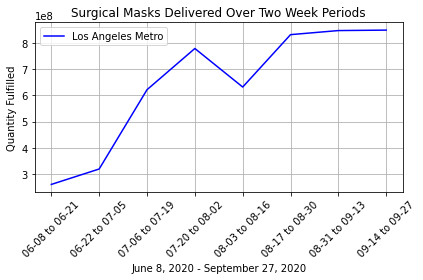

In [16]:
date_axis = ["06-08 to 06-21", "06-22 to 07-05", "07-06 to 07-19", "07-20 to 08-02",
             "08-03 to 08-16", "08-17 to 08-30", "08-31 to 09-13", "09-14 to 09-27"]

LA_SM_line, = plt.plot(date_axis, LA_surgical, color="blue", label="Los Angeles Metro")

plt.xlabel("June 8, 2020 - September 27, 2020")
plt.ylabel("Quantity Fulfilled")
plt.title("Surgical Masks Delivered Over Two Week Periods")
plt.legend(handles=[LA_SM_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.show()

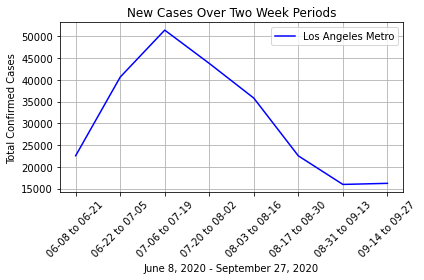

In [17]:
LA_new_cases = row_list[25]
LA_cases_line, = plt.plot(date_axis, LA_new_cases, color="blue", label="Los Angeles Metro")

plt.xlabel("June 8, 2020 - September 27, 2020")
plt.ylabel("Total Confirmed Cases")
plt.title("New Cases Over Two Week Periods")
plt.legend(handles=[LA_cases_line], loc="best")
plt.xticks(date_axis, rotation="45")
plt.grid()
plt.tight_layout()
plt.show()

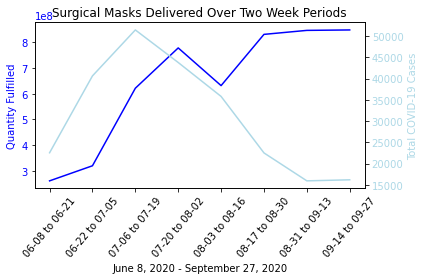

In [30]:
#plot both data with different scales on the same date/x-axis
fig, ax1 = plt.subplots()

color = "blue"
ax1.set_xlabel("June 8, 2020 - September 27, 2020")
ax1.set_ylabel("Quantity Fulfilled", color=color)
ax1.plot(date_axis, LA_surgical, color=color)
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation=50)

#"instantiate a second axes that shares the same x-axis"KN95 Respirators
ax2 = ax1.twinx()

color = "lightblue"
ax2.set_ylabel("Total COVID-19 Cases", color=color)  # we already handled the x-label with ax1
ax2.plot(date_axis, LA_new_cases, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Surgical Masks Delivered Over Two Week Periods")
fig.tight_layout()

plt.show()

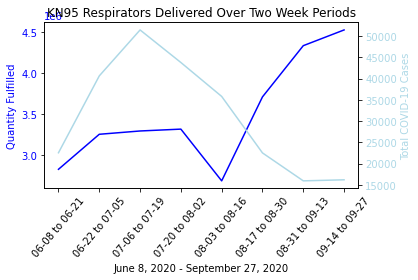

In [32]:
LA_rep = row_list[16]

fig, ax1 = plt.subplots()

color = "blue"
ax1.set_xlabel("June 8, 2020 - September 27, 2020")
ax1.set_ylabel("Quantity Fulfilled", color=color)
ax1.plot(date_axis, LA_rep, color=color)
ax1.tick_params(axis="y", labelcolor=color)
plt.xticks(rotation=50)

ax2 = ax1.twinx()

color = "lightblue"
ax2.set_ylabel("Total COVID-19 Cases", color=color)
ax2.plot(date_axis, LA_new_cases, color=color)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("KN95 Respirators Delivered Over Two Week Periods")
fig.tight_layout()

plt.show()

In [ ]:
SF_cases = cases_df.loc[(cases_df["county"] == "San Francisco")]
MA_cases = cases_df.loc[(cases_df["county"] == "Marin")]
merge1 = pd.merge(SF_cases, MA_cases, how="outer", on="date")

AL_cases = cases_df.loc[(cases_df["county"] == "Alameda")]
merge2 = pd.merge(merge1, AL_cases, how="outer", on="date")
merge2 = merge2[["newcountconfirmed_x", "date", "newcountconfirmed_y", "newcountconfirmed"]]
merge2 = merge2.rename(columns={"newcountconfirmed_x":  "SFcount", "newcountconfirmed_y": "MAcount", "newcountconfirmed": "ALcount"})

CC_cases = cases_df.loc[(cases_df["county"] == "Contra Costa")]
merge3 = pd.merge(merge2, CC_cases, how="outer", on="date")

SM_cases = cases_df.loc[(cases_df["county"] == "San Mateo")]
SF_metro = pd.merge(merge3, SM_cases, how="outer", on="date")
SF_metro = SF_metro[["SFcount", "date", "MAcount", "ALcount", "newcountconfirmed_x", "newcountconfirmed_y"]]

SF_metro["newcounts"] = SF_metro["SFcount"] + SF_metro["MAcount"] + SF_metro["ALcount"] + SF_metro["newcountconfirmed_x"] + SF_metro["newcountconfirmed_y"]